In [1]:
# ==========================================================
# Análisis de Datos - Spotify Dataset
# Autor: Isaac Chávez
# ==========================================================

# -------------------------
# 1. Librerías necesarias
# -------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mostrar gráficos dentro del notebook
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
# -------------------------
# 2. Cargar los datos
# -------------------------

archivo = "/Users/isaac/Documents/TEC/3er Semestre/SemanaTec2/arteAnalitica/Spotify/spotify.csv"

# Leemos el dataset
spotify = pd.read_csv(archivo)

# Mostrar las primeras filas para entender la información
spotify.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# -------------------------
# 3. Información general del dataset
# -------------------------

# Número de filas y columnas
print("Dimensiones del dataset:", spotify.shape)

# Columnas presentes
print("\nColumnas disponibles:")
print(list(spotify.columns))

# Tipos de datos
print("\nTipos de datos de cada columna:")
print(spotify.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(spotify.isnull().sum())


Dimensiones del dataset: (114000, 21)

Columnas disponibles:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Tipos de datos de cada columna:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Valores nulos por columna:


In [4]:
# -------------------------
# 4. Análisis de variables numéricas
# -------------------------

# Seleccionar solo las columnas numéricas
numericas = spotify.select_dtypes(include=[np.number])
print("Columnas numéricas detectadas:")
print(list(numericas.columns))

# Valores mínimos y máximos para entender los rangos
print("\nRangos de valores de las columnas numéricas:")
display(numericas.describe().loc[['min','max']])


Columnas numéricas detectadas:
['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

Rangos de valores de las columnas numéricas:


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
min,0.0,0.0,0.0,0.000,0.0,0.0,-49.531,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0
max,113999.0,100.0,5237295.0,0.985,1.0,11.0,4.532,1.0,0.965,0.996,1.0,1.0,0.995,243.372,5.0


In [5]:
# -------------------------
# 5. Estadísticas básicas
# -------------------------

# Media, mediana y desviación estándar
estadisticas = numericas.describe().T
estadisticas['mediana'] = numericas.median()
estadisticas = estadisticas[['mean', 'mediana', 'std']]

print("Estadísticas descriptivas de las variables numéricas:")
display(estadisticas)


Estadísticas descriptivas de las variables numéricas:


,mean,mediana,std
Unnamed: 0,56999.500000,56999.500000,32909.109681
popularity,33.238535,35.000000,22.305078
duration_ms,228029.153114,212906.000000,107297.712645
danceability,0.566800,0.580000,0.173542
energy,0.641383,0.685000,0.251529
key,5.309140,5.000000,3.559987
loudness,-8.258960,-7.004000,5.029337
mode,0.637553,1.000000,0.480709
speechiness,0.084652,0.048900,0.105732
acousticness,0.314910,0.169000,0.332523


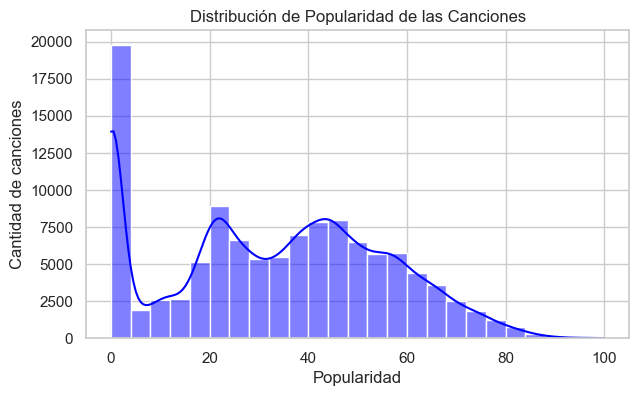

In [6]:
# -------------------------
# 6. Visualización
# -------------------------

# Histograma de popularidad si existe la columna
if 'popularity' in spotify.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(spotify['popularity'], bins=25, kde=True, color='blue')
    plt.title("Distribución de Popularidad de las Canciones")
    plt.xlabel("Popularidad")
    plt.ylabel("Cantidad de canciones")
    plt.show()
else:
    print("La columna 'popularity' no se encuentra en el dataset.")


In [ ]:
# -------------------------
# 7. Conclusiones
# -------------------------

print("Conclusiones basadas en media, mediana y desviación estándar:\n")

# Excluir columnas que no aportan información real (por ej. índices)
columnas_validas = [col for col in numericas.columns if "Unnamed" not in col]

for col in columnas_validas: # Ciclo for para poder imprimir todos los datos de cada columna
    media = spotify[col].mean()
    mediana = spotify[col].median()
    desviacion = spotify[col].std()
    
    print(f"Columna: {col}")
    print(f"  Media: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Desviación estándar: {desviacion:.2f}")
    
# Conclusiones
print("\nResumen de conclusiones:")
print("La popularidad de las canciones muestra amplia variabilidad, con muchas canciones poco escuchadas y algunas muy populares.")
print("La duración promedio de las canciones es de aproximadamente 3 a 4 minutos, aunque existen temas significativamente más largos o más cortos.")
print("La danceabilidad y energía presentan valores moderados y relativamente consistentes, indicando que la mayoría de canciones mantiene un perfil similar en estos atributos.")
print("En general, el dataset refleja la diversidad musical de Spotify: hay canciones con características muy distintas en popularidad y duración, mientras que otros atributos musicales son más homogéneos.")


Conclusiones basadas en media, mediana y desviación estándar:

Columna: popularity
  Media: 33.24
  Mediana: 35.00
  Desviación estándar: 22.31
Columna: duration_ms
  Media: 228029.15
  Mediana: 212906.00
  Desviación estándar: 107297.71
Columna: danceability
  Media: 0.57
  Mediana: 0.58
  Desviación estándar: 0.17
Columna: energy
  Media: 0.64
  Mediana: 0.69
  Desviación estándar: 0.25
Columna: key
  Media: 5.31
  Mediana: 5.00
  Desviación estándar: 3.56
Columna: loudness
  Media: -8.26
  Mediana: -7.00
  Desviación estándar: 5.03
Columna: mode
  Media: 0.64
  Mediana: 1.00
  Desviación estándar: 0.48
Columna: speechiness
  Media: 0.08
  Mediana: 0.05
  Desviación estándar: 0.11
Columna: acousticness
  Media: 0.31
  Mediana: 0.17
  Desviación estándar: 0.33
Columna: instrumentalness
  Media: 0.16
  Mediana: 0.00
  Desviación estándar: 0.31
Columna: liveness
  Media: 0.21
  Mediana: 0.13
  Desviación estándar: 0.19
Columna: valence
  Media: 0.47
  Mediana: 0.46
  Desviación estándar